In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import joblib

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('autoscout24.csv')

In [3]:
df.shape

(46405, 9)

In [4]:
print(f"Der Datensatz besteht aus:")
print(f"{df.shape[0]} Zeilen.")
print(f"{df.shape[1]} Spalten.")


Der Datensatz besteht aus:
46405 Zeilen.
9 Spalten.


In [5]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [6]:
print(df.info())
print()
print("Wir erkenn hier, dass model, gear und hp null-Werte aufweisen.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB
None

Wir erkenn hier, dass model, gear und hp null-Werte aufweisen.


In [7]:
print("Desweiteren erkennen wir, dass der Datensatz 5 kategorische und 4 nummerische Features aufweist.")
print()
print("""Categorical Features:
- make       
- model
- fuel
- gear
- offerType""")
print()
print("""Numeric Features:
- mileage       
- price
- hp
- year""")

Desweiteren erkennen wir, dass der Datensatz 5 kategorische und 4 nummerische Features aufweist.

Categorical Features:
- make       
- model
- fuel
- gear
- offerType

Numeric Features:
- mileage       
- price
- hp
- year


## Erklärung der Features

### mileage = Kilometerstand
### make = Hersteller
### model = Fahrzeugmodell
### fuel = Kraftstoffart
### gear = Getriebetyp
### offerType = Fahrzeugart (Gebraucht/Neu)
### price = Preis
### hp = PferdeStärken
### year = Erstzulassungsjahr

In [8]:
df['make'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)

In [9]:
df['make'].nunique()

77

In [10]:
df['model'].unique()

array(['316', 'Golf', 'Exeo', 'Megane', '308', 'Auris', 'Scenic',
       'Zafira', '3', 'Transit', 'Meriva', 'E 250', 'Orlando', 'A4',
       'Polo', 'Espace', 'Grand Espace', 'Sedici', 'Corsa', 'Picanto',
       'Duster', 'Cross Touran', 'Beetle', 'Golf Cabriolet', '118',
       'Astra', 'Focus', 'One D Countryman', 'Cooper Clubman', 'B 180',
       'Insignia', 'One', '320', 'iX35', 'Adam', '520', 'B-Max',
       'Golf Variant', 'Touran', 'Optima', '114', 'Galaxy', 'Leon', 'A1',
       'Trax', 'Verso', 'Golf Plus', 'Fiesta', 'Vivaro', 'Yaris', 'iX20',
       'up!', 'Rapid/Spaceback', '116', 'Passat Variant', "Ceed / cee'd",
       'Fabia', 'Ibiza', 'C-Max', 'Boxer', 'Superb', 'C4 Cactus', '208',
       'Q70', 'Swift', 'Korando', 'Sandero', '2', 'Sorento', 'GLC 220',
       'A6', 'E 400', 'forTwo', 'Mii', 'Citigo', 'Aygo', 'Punto', 'i10',
       'forFour', 'A6 allroad', 'A4 allroad', 'GLC 250', 'Q2', 'Tiguan',
       'Ateca', 'Amarok', 'Q5', 'SQ5', 'Q7', 'M2', 'XC90', 'X3', 'X2',
     

In [11]:
df['model'].nunique()

841

In [12]:
df['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [13]:
df['gear'].unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [14]:
df['offerType'].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [15]:
print("Used           == Gebraucht")
print("Demonstration  == Vorführwagen")
print("Employee's car == Jahreswagen")
print("Pre-registered == Tageszulassung")
print("New            == Neu")

Used           == Gebraucht
Demonstration  == Vorführwagen
Employee's car == Jahreswagen
Pre-registered == Tageszulassung
New            == Neu


## Duplikate und null-Werte entfernen

In [17]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [18]:
print("Da wir sehr wenig null-Werte im vergleich zum kompletten Datensatz haben und nur HorsePower nummerisch ist, droppen wir die fehlenden Werte aus dem DataFrame.")
df.dropna(inplace = True)
df.shape

Da wir sehr wenig null-Werte im vergleich zum kompletten Datensatz haben und nur HorsePower nummerisch ist, droppen wir die fehlenden Werte aus dem DataFrame.


(46071, 9)

In [19]:
# Duplikate enfernen
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(43947, 9)

In [20]:
print(df.describe())
print()
print("Der Datensatz enthält Fahrzeug zwischen 2011 und 2021, wobei die Verteilung ausgeglichen scheint.")
print("Die PS liegen im Mittel bei 133, die Obergrenze beträgt 850 und die Untergrenze 1. Wobei die Untergrenze eventuell unrealistisch sein könnte.")
print("Die Preise variieren zwischen 1.100 € und 1.199.900 € und liegen im Schnitt bei ~16.546,56 €. Der Meridian ist jedoch bei 10.999,00 €. Die Hälfte der Fahrzeuge befinden sich also bei einem Wert unter 11.000 €.")
print("Die Kilometer gehen von 0 bis 1.111.111 und liegen im Schnitt bei ~72.313. Der Meridian ist hier bei 61.309.")

            mileage         price            hp          year
count  4.394700e+04  4.394700e+04  43947.000000  43947.000000
mean   7.231258e+04  1.654656e+04    133.624571   2015.931349
std    6.217336e+04  1.944680e+04     75.049853      3.120073
min    0.000000e+00  1.100000e+03      1.000000   2011.000000
25%    2.150000e+04  7.490000e+03     86.000000   2013.000000
50%    6.130900e+04  1.099000e+04    116.000000   2016.000000
75%    1.060000e+05  1.949000e+04    150.000000   2019.000000
max    1.111111e+06  1.199900e+06    850.000000   2021.000000

Der Datensatz enthält Fahrzeug zwischen 2011 und 2021, wobei die Verteilung ausgeglichen scheint.
Die PS liegen im Mittel bei 133, die Obergrenze beträgt 850 und die Untergrenze 1. Wobei die Untergrenze eventuell unrealistisch sein könnte.
Die Preise variieren zwischen 1.100 € und 1.199.900 € und liegen im Schnitt bei ~16.546,56 €. Der Meridian ist jedoch bei 10.999,00 €. Die Hälfte der Fahrzeuge befinden sich also bei einem Wert unter 1

In [21]:
df[df['hp'] < 10]

,mileage,make,model,fuel,gear,offerType,price,hp,year
1985,21800,Microcar,Due,Diesel,Automatic,Used,8490,5.0,2017
7085,18137,Ligier,JS 50,Diesel,Automatic,Used,9950,5.0,2016
7597,5,Aixam,City,Diesel,Automatic,Used,17370,8.0,2021
9110,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012
12236,49670,Microcar,M.Go,Diesel,Automatic,Used,4950,5.0,2011
13841,13680,Microcar,M.Go,Diesel,Automatic,Used,10500,8.0,2018
18544,51355,Renault,Twizy,Electric,Automatic,Used,4990,5.0,2017
25859,15766,Microcar,M8,Diesel,Manual,Used,3900,5.0,2014
30006,10,Hyundai,Kona,Electric/Gasoline,Automatic,Pre-registered,29490,5.0,2020
30563,24000,Microcar,M.Go,Diesel,Automatic,Used,8200,5.0,2016


## Auto mit 1 PS anpassen

In [22]:
print("Wir erkennen hier das der Renault Megane, dass einzige Auto mit hp 1 ist. Laut meiner Recherche sind die anderen Autos alles kleinere Autos welche für den Stadtverkehr entwickelt wurden und deshalb auch die niedrigen Werte übereinstimmen.")
print()
print("Im nächsten Schritt werfen wir also den Renault Megane raus oder schauen ob wir den Wert sinnvoll ersetzen können.")

Wir erkennen hier das der Renault Megane, dass einzige Auto mit hp 1 ist. Laut meiner Recherche sind die anderen Autos alles kleinere Autos welche für den Stadtverkehr entwickelt wurden und deshalb auch die niedrigen Werte übereinstimmen.

Im nächsten Schritt werfen wir also den Renault Megane raus oder schauen ob wir den Wert sinnvoll ersetzen können.


In [23]:
df[(df['model'] == "Megane") & (df['year'] == 2012) & (df['fuel'] == "Diesel")]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9110,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012
9497,148401,Renault,Megane,Diesel,Manual,Used,5990,106.0,2012
11191,111000,Renault,Megane,Diesel,Manual,Used,5999,106.0,2012
12482,124000,Renault,Megane,Diesel,Manual,Used,5750,106.0,2012
15032,147000,Renault,Megane,Diesel,Manual,Used,9500,131.0,2012
23705,132000,Renault,Megane,Diesel,Manual,Used,4999,110.0,2012
24974,242606,Renault,Megane,Diesel,Manual,Used,4349,110.0,2012
30492,77000,Renault,Megane,Diesel,Manual,Used,7000,110.0,2012
32846,150000,Renault,Megane,Diesel,Manual,Used,4399,106.0,2012
33267,165000,Renault,Megane,Diesel,Manual,Used,4650,131.0,2012


In [24]:
df[(df['model'] == "Megane") & (df['year'] == 2012) & (df['fuel'] == "Diesel") & (df['hp'] > 1)]["hp"].mean()

113.11764705882354

In [25]:
print("Wir sehen, dass die Renault Megane Modelle aus dem Jahr 2012 im Schnitt 113 PS haben, der näheste Wert hier wäre also 110.")

Wir sehen, dass die Renault Megane Modelle aus dem Jahr 2012 im Schnitt 113 PS haben, der näheste Wert hier wäre also 110.


In [26]:
# Index zurücksetzen, da wir vorher null-Werte und Duplikate enfernt haben.
df = df.reset_index(drop=True)

In [27]:
df[(df['hp'] == 1)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
8652,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012


In [28]:
df.at[8652, 'hp'] = 110

In [29]:
df.iloc[8652]

mileage       167000
make         Renault
model         Megane
fuel          Diesel
gear          Manual
offerType       Used
price           5450
hp             110.0
year            2012
Name: 8652, dtype: object

In [30]:
df.describe()

,mileage,price,hp,year
count,4.394700e+04,4.394700e+04,43947.000000,43947.000000
mean,7.231258e+04,1.654656e+04,133.627051,2015.931349
std,6.217336e+04,1.944680e+04,75.047271,3.120073
min,0.000000e+00,1.100000e+03,5.000000,2011.000000
25%,2.150000e+04,7.490000e+03,86.000000,2013.000000
50%,6.130900e+04,1.099000e+04,116.000000,2016.000000
75%,1.060000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


## Drop Marke Others

In [31]:
df['make'].nunique()

71

In [32]:
df[df['make']=='Others']

,mileage,make,model,fuel,gear,offerType,price,hp,year
23011,1,Others,Landwind,Gasoline,Manual,Used,1850,97.0,2012


In [33]:
df = df.drop(index=df.iloc[23011].name)

## Verteilung der kategorischen Werte

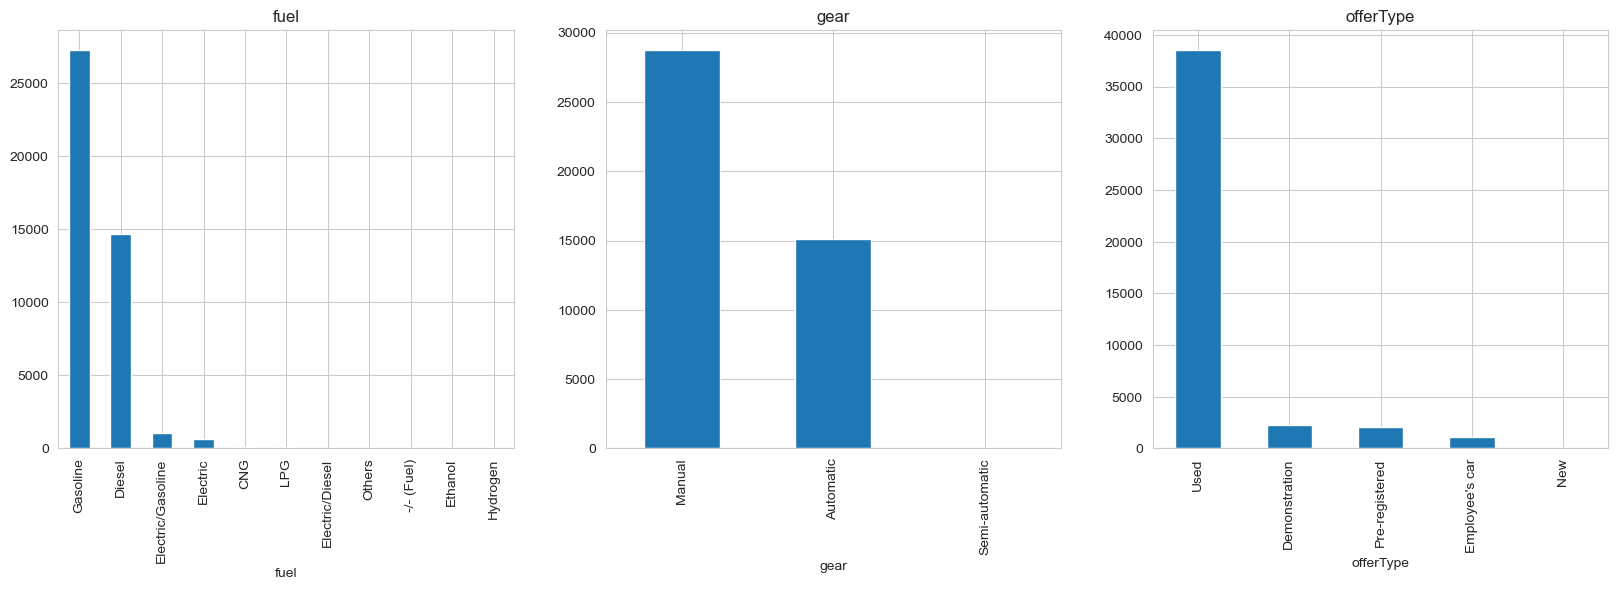

In [34]:
col_category = ['fuel','gear','offerType']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df[col].value_counts().plot(kind='bar');
    plt.title(col)

In [35]:
print("Wir können hier erkennen, dass Benzin und Diesel den größten Teil der Kraftstoffarten ausmacht.")
print("Wir sehen, dass es so fast doppelt soviele Fahrzeuge mit Schaltgetriebe als welche mit Automatikgetriebe gibt. Halbautomatik sind fast keine vorhanden.")
print("Die Gebrauchtwagen dominieren das Angebot auf dem Online-Portal. Neufahrzeuge werden weniger angeboten im vergleich zum Jahreswagen.")

Wir können hier erkennen, dass Benzin und Diesel den größten Teil der Kraftstoffarten ausmacht.
Wir sehen, dass es so fast doppelt soviele Fahrzeuge mit Schaltgetriebe als welche mit Automatikgetriebe gibt. Halbautomatik sind fast keine vorhanden.
Die Gebrauchtwagen dominieren das Angebot auf dem Online-Portal. Neufahrzeuge werden weniger angeboten im vergleich zum Jahreswagen.


Manual: 10502.18 €  Durchschnittspreis 
Automatic:      28054.26 € Durchschnittspreis 


<Axes: xlabel='gear', ylabel='price'>

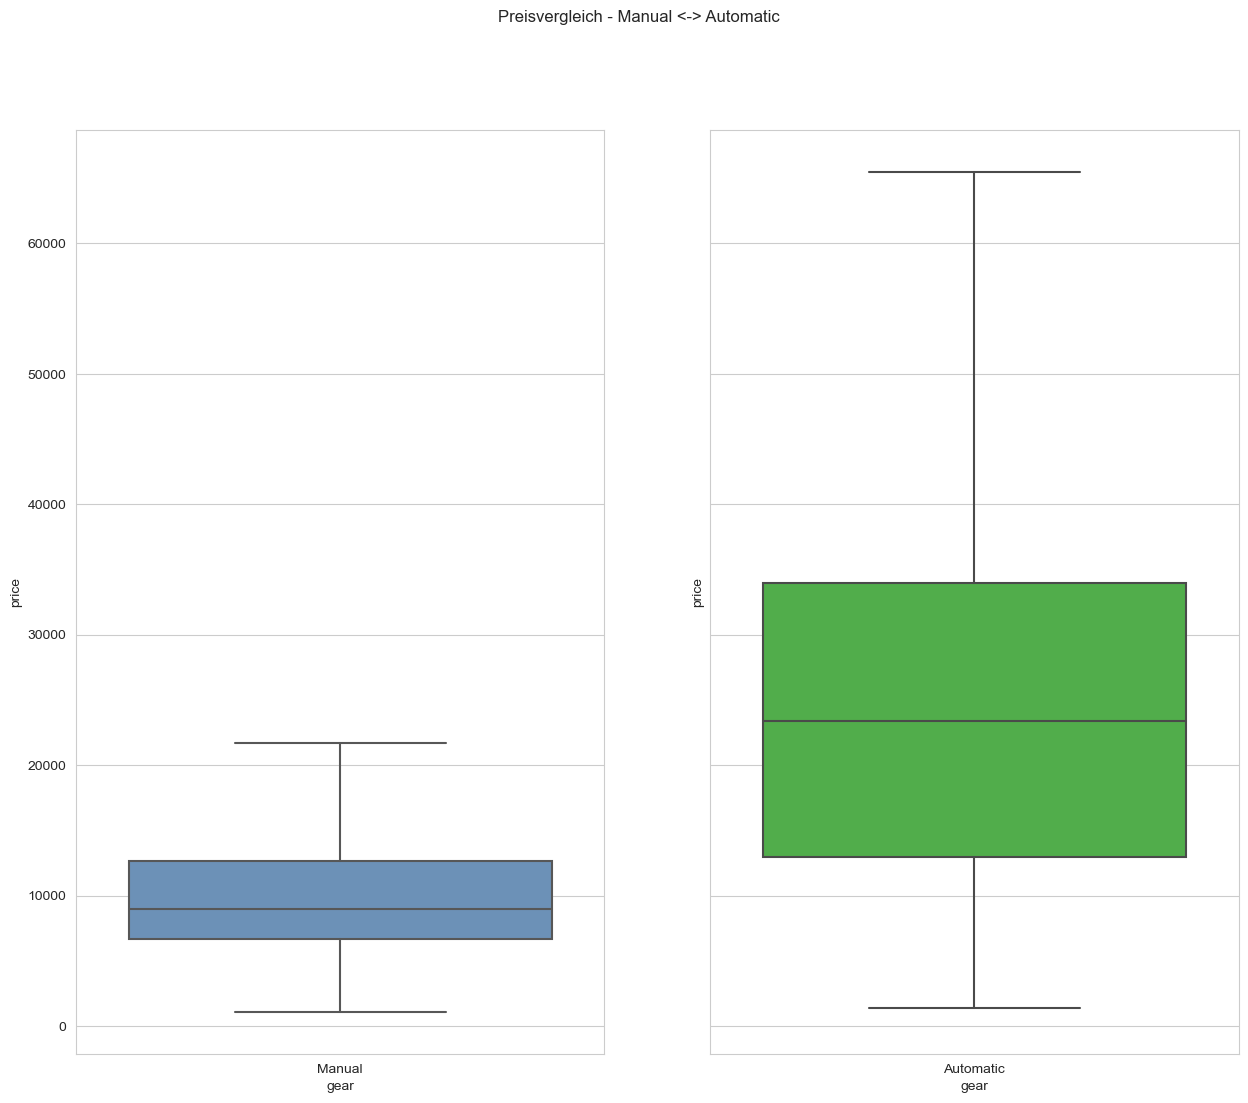

In [36]:
print(f"Manual: {df[df['gear'] == 'Manual']['price'].mean().round(2)} €  Durchschnittspreis ")
print(f"Automatic:      {df[df['gear'] == 'Automatic']['price'].mean().round(2)} € Durchschnittspreis ")

fig, axes = plt.subplots(1, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Preisvergleich - Manual <-> Automatic')
sns.boxplot(ax=axes[0], x='gear', y='price', data=df[df['gear'] == 'Manual'], color='#6091c3', showfliers = False)

sns.boxplot(ax=axes[1], x='gear', y='price', data=df[df['gear'] == 'Automatic'], color='#42bd3b', showfliers = False)

In [37]:
def carsGearByYear(df):
    gears = df['gear'].unique().tolist()
    gears = gears[:-1]
    years = df['year'].unique().tolist()
    d = []
    for g in gears:
        #print(g)
        for y in years:    
            d.append({
                'gear': g,
                'year': y,
                'count': len(df[(df['gear'] == g) & (df['year'] == y)])
            })

    return pd.DataFrame(d)

In [38]:
df_carsGearByYear = carsGearByYear(df)
df_carsGearByYear

,gear,year,count
0,Manual,2011,3180
1,Manual,2012,3147
2,Manual,2013,3077
3,Manual,2014,3093
4,Manual,2015,3137
5,Manual,2016,3005
6,Manual,2017,2332
7,Manual,2018,2019
8,Manual,2019,2121
9,Manual,2020,1871


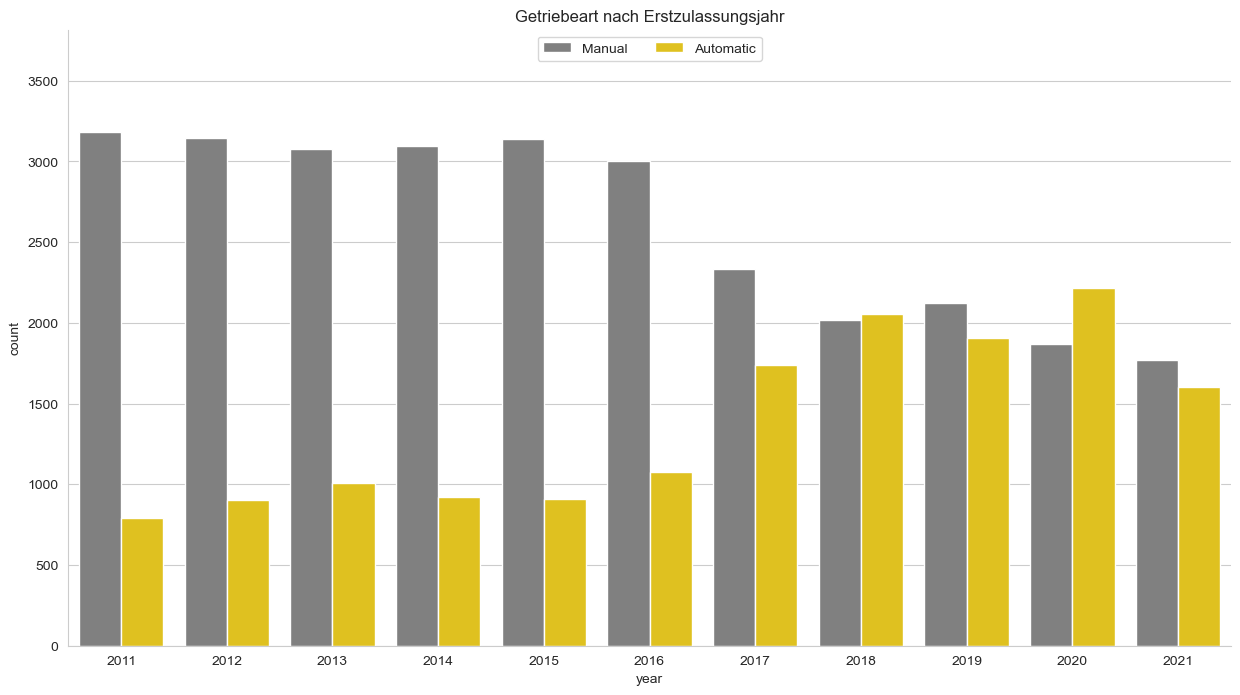

In [39]:
colors = ["#808080", "#FFD700"]
f, ax = plt.subplots(figsize = (15,8))
sns.barplot(data= df_carsGearByYear,x="year", y="count", hue="gear",palette = colors)
plt.title('Getriebeart nach Erstzulassungsjahr')
ax.legend(ncol = 2, loc = 'upper center')

ax.margins(y=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


In [40]:
print("https://www.t-online.de/mobilitaet/aktuelles/id_100060696/immer-mehr-autos-fahren-mit-automatik-stirbt-das-schaltgetriebe-bald-aus-.html")
print("https://www.auto-motor-und-sport.de/verkehr/schaltgetriebe-aus-bei-vw-ab-2023-nur-noch-automatik/")

https://www.t-online.de/mobilitaet/aktuelles/id_100060696/immer-mehr-autos-fahren-mit-automatik-stirbt-das-schaltgetriebe-bald-aus-.html
https://www.auto-motor-und-sport.de/verkehr/schaltgetriebe-aus-bei-vw-ab-2023-nur-noch-automatik/


In [41]:
df['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [42]:
def carsFuelByYear(df):
    fuels = df['fuel'].unique().tolist()
    fuels = fuels[:-9]
    fuels.append('Electric/Gasoline')
    fuels.append('Electric')
    years = df['year'].unique().tolist()
    d = []
    for f in fuels:
        #print(f)
        for y in years:    
            d.append({
                'fuel': f,
                'year': y,
                'count': len(df[(df['fuel'] == f) & (df['year'] == y)])
            })

    return pd.DataFrame(d)

In [43]:
df_carsFuelByYear = carsFuelByYear(df)
df_carsFuelByYear

,fuel,year,count
0,Diesel,2011,1369
1,Diesel,2012,1461
2,Diesel,2013,1471
3,Diesel,2014,1438
4,Diesel,2015,1519
5,Diesel,2016,1541
6,Diesel,2017,1664
7,Diesel,2018,1585
8,Diesel,2019,1153
9,Diesel,2020,1025


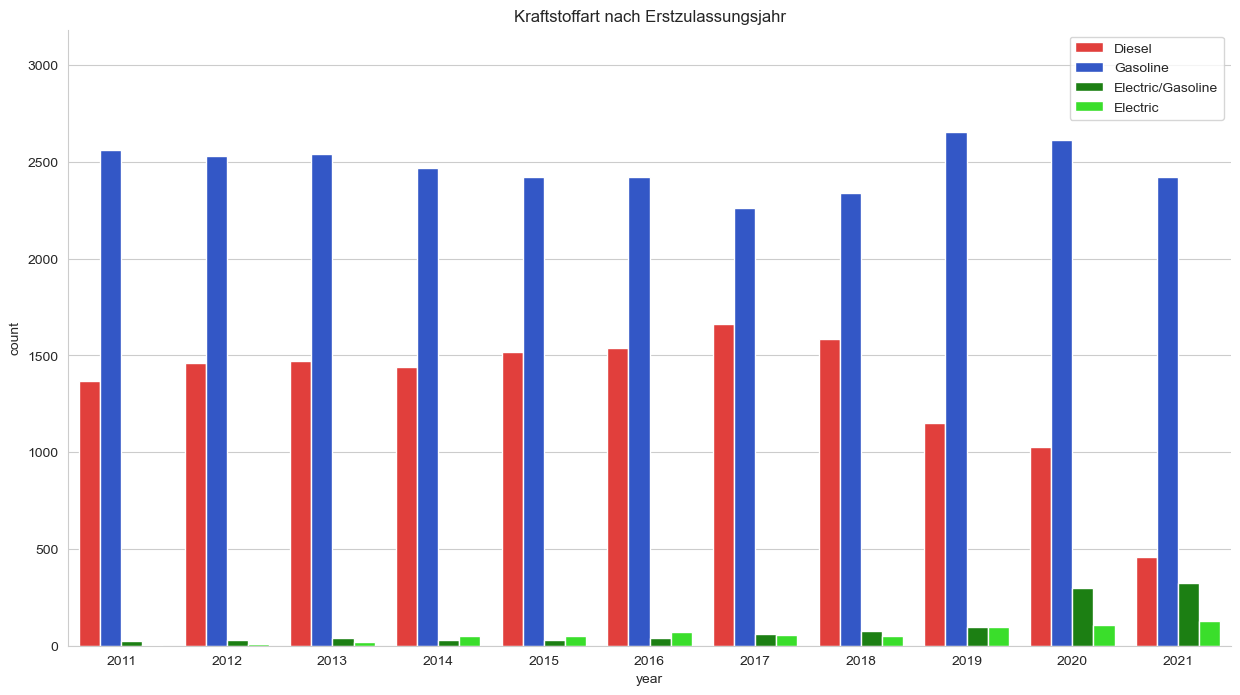

In [44]:
colors = ["#fc2421", "#1a4bdf", '#0d9101', '#21fc0d']
f, ax = plt.subplots(figsize = (15,8))
sns.barplot(data= df_carsFuelByYear,x="year", y="count", hue="fuel",palette = colors)
plt.title('Kraftstoffart nach Erstzulassungsjahr')
ax.legend(ncol = 1, loc = 'upper right')

ax.margins(y=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [45]:
print("https://de.statista.com/statistik/daten/studie/469049/umfrage/produktion-von-diesel-pkw-in-deutschland/")
print("https://www.autobild.de/artikel/diesel-das-sind-die-diesel-plaene-der-autohersteller-50918.html")

https://de.statista.com/statistik/daten/studie/469049/umfrage/produktion-von-diesel-pkw-in-deutschland/
https://www.autobild.de/artikel/diesel-das-sind-die-diesel-plaene-der-autohersteller-50918.html


Text(0.5, 1.0, 'Marken Verteilung in Prozent')

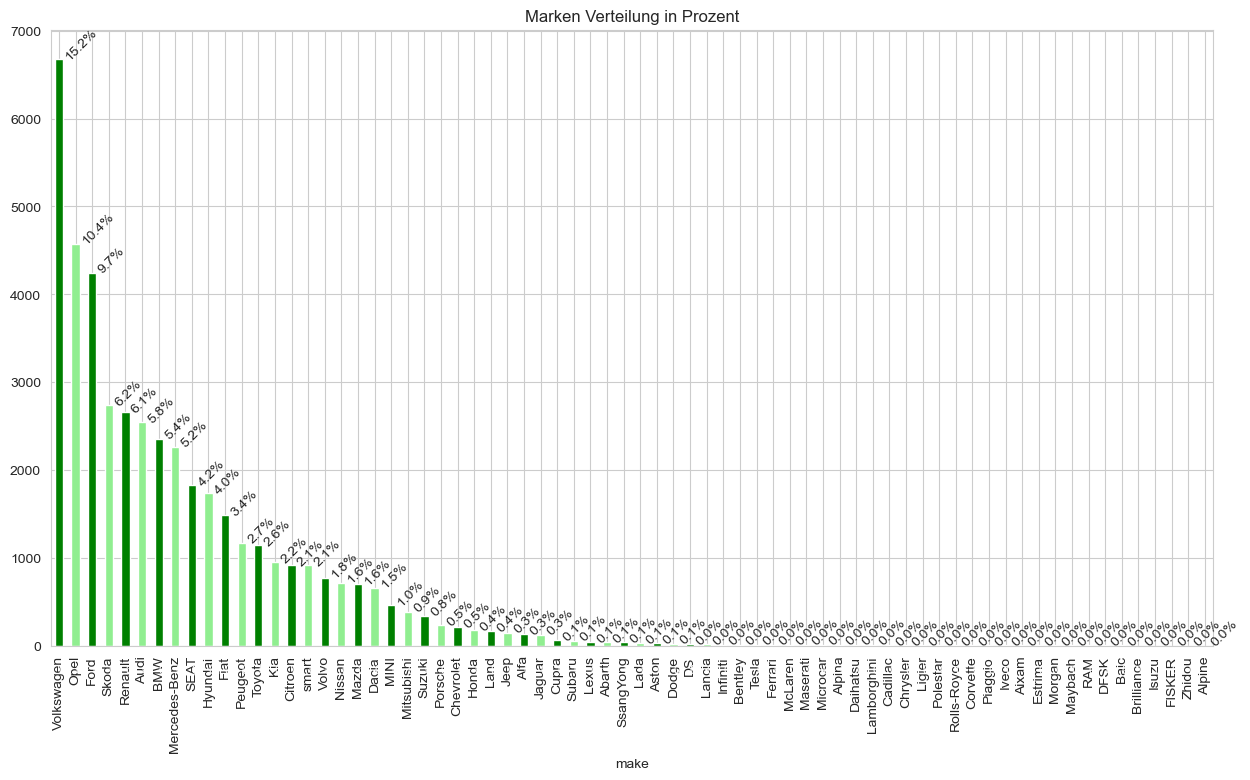

In [46]:
plt.figure(figsize=(15,8))  
ax = df['make'].value_counts().plot(kind='bar', color=['green','lightgreen']);
total = len(df['make'])
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(-10, -20),fontsize=9,color='white',textcoords='offset points', horizontalalignment='right')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), rotation = 45)
plt.title('Marken Verteilung in Prozent')

Text(0.5, 1.0, 'Modell Verteilung in Prozent (Top 80)')

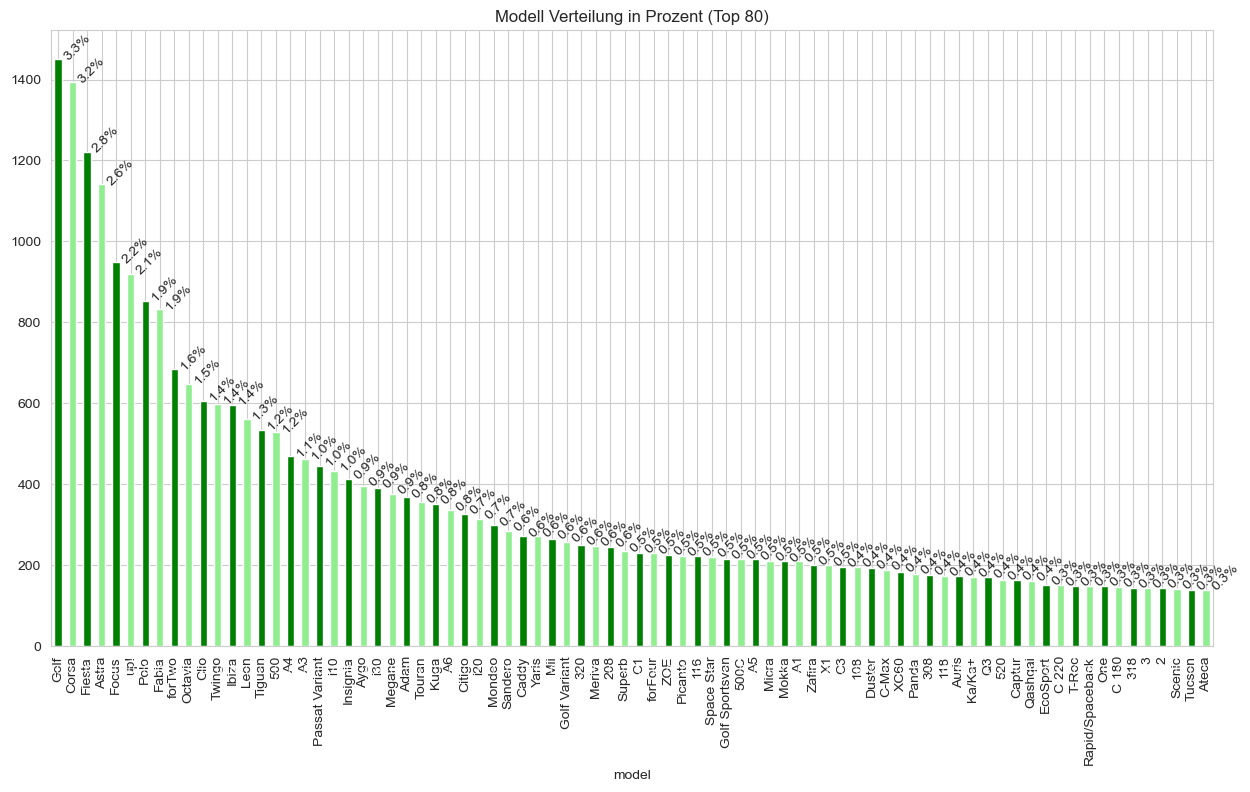

In [47]:
plt.figure(figsize=(15,8))  
ax = df['model'].value_counts().iloc[:80].plot(kind='bar', color=['green','lightgreen']);
total = len(df['model'])
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(-10, -20),fontsize=9,color='white',textcoords='offset points', horizontalalignment='right')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), rotation = 45)
plt.title('Modell Verteilung in Prozent (Top 80)')

## Top 3 der Marken und Modelle nach Erstzulassungsjahr

In [48]:
columns=['Jahr', 'Top', 'TopMarke', 'Anzahl Marke', 'Top', 'TopModell', 'Anzahl Modell']
data=[]
for y in df['year'].unique():
    #print(f"---------------------------------------------- Year: {y}")
    for i in range(3):
        makeYear=df[df["year"]==y].make.value_counts().iloc[0+i:1+i].index.tolist()
        makeYearCount=df[df["year"]==y].make.value_counts().iloc[0+i:1+i].tolist()
        modelYear=df[df["year"]==y].model.value_counts().iloc[0+i:1+i].index.tolist()
        modelYearCount=df[df["year"]==y].model.value_counts().iloc[0+i:1+i].tolist()
        #print(f"makeYear: {makeYear[0]}")
        #print(f"makeYearCount: {makeYearCount[0]}")
        #print(f"modelYear: {modelYear[0]}")
        #print(f"modelYearCount: {modelYearCount[0]}")
        data.append([y,i+1,makeYear[0],makeYearCount[0],i+1,modelYear[0],modelYearCount[0]])

#print(data)
df_topMakeAndModelByYear = pd.DataFrame(data, columns=columns)
print("Top Marke und Modell, welche in jeweiligen Jahr zugelassen wurden und zum Kauf angeboten werden.")
df_topMakeAndModelByYear

Top Marke und Modell, welche in jeweiligen Jahr zugelassen wurden und zum Kauf angeboten werden.


,Jahr,Top,TopMarke,Anzahl Marke,Top,TopModell,Anzahl Modell
0,2011,1,Volkswagen,681,1,Golf,196
1,2011,2,Opel,406,2,Corsa,131
2,2011,3,Ford,274,3,Astra,119
3,2012,1,Volkswagen,637,1,Golf,160
4,2012,2,Opel,429,2,Corsa,128
5,2012,3,Ford,309,3,Astra,118
6,2013,1,Volkswagen,643,1,Golf,158
7,2013,2,Opel,439,2,Corsa,117
8,2013,3,Ford,392,3,Fiesta,97
9,2014,1,Volkswagen,588,1,Corsa,149


In [49]:
df_topMakeAndModelByYear.iloc[0,2]

'Volkswagen'

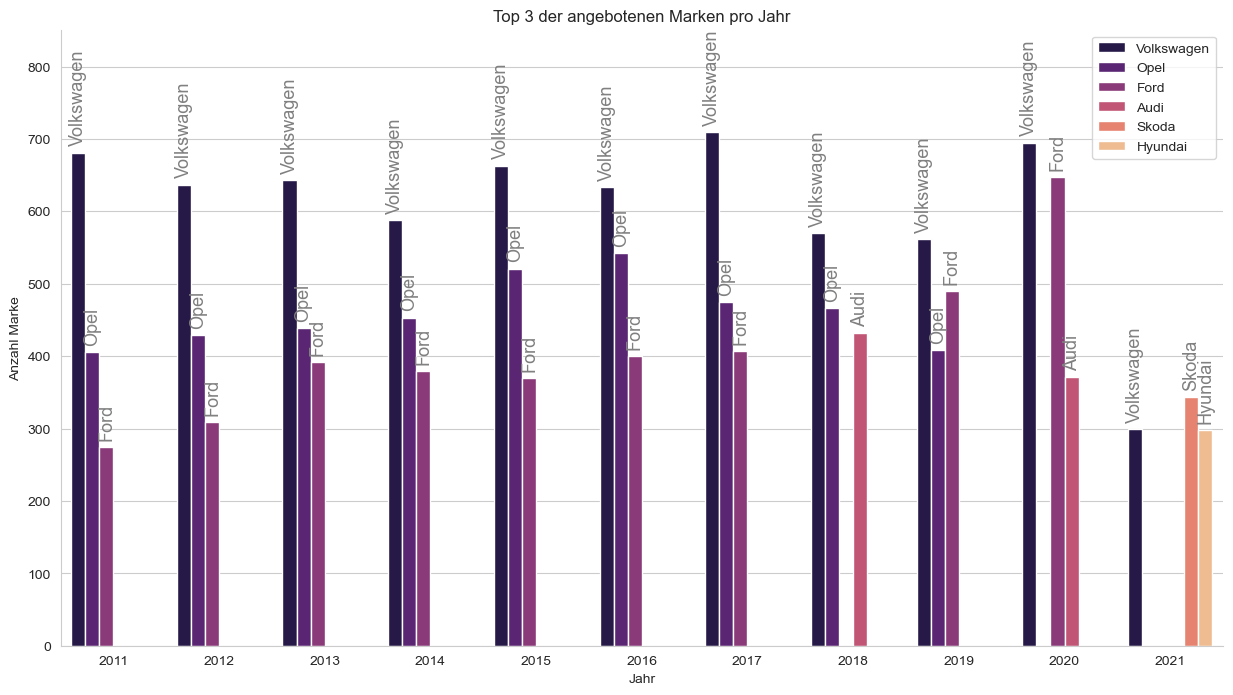

In [50]:
f, ax = plt.subplots(figsize = (15,8))
sns.barplot(data= df_topMakeAndModelByYear,x="Jahr", y="Anzahl Marke", hue="TopMarke",palette = 'magma')
plt.title('Top 3 der angebotenen Marken pro Jahr')
ax.legend(ncol = 1, loc = 'upper right')

# customize the label
labels1 = ['Volkswagen' for i, v in enumerate(ax.containers[0])]
labels2 = ['Opel' for i, v in enumerate(ax.containers[1])]
labels3 = ['Ford' for i, v in enumerate(ax.containers[2])]
labels4 = ['Audi' for i, v in enumerate(ax.containers[3])]
labels5 = ['Skoda' for i, v in enumerate(ax.containers[4])]
labels6 = ['Hyundai' for i, v in enumerate(ax.containers[5])]
# set the bar label
ax.bar_label(ax.containers[0], labels=labels1, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[1], labels=labels2, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[2], labels=labels3, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[3], labels=labels4, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[4], labels=labels5, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[5], labels=labels6, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.margins(y=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


In [51]:
print("Bis 2017 hatten Marken wie Volkswagen, Opel und Ford die meisten Inserate auf Autoscout. Ab 2018 sehen wir, dass Marken wie Audi, Skoda oder Hyundai sich auf dem Gebrauchtwagenmarkt vermehrt haben.")
print()
print("Aus meiner empirischen Erkenntis, sind auch in den letzten Jahren immer mehr Skoda Fahrzeuge auf den Straßen unterwegs. Das könnte daran liegen, dass Skoda technisch und qualitativ nicht mehr weit von seinem Mutterkonzern Volkswagen liegt. Dafür aber im Preis der Fahrzeuge günstiger ist.")

Bis 2017 hatten Marken wie Volkswagen, Opel und Ford die meisten Inserate auf Autoscout. Ab 2018 sehen wir, dass Marken wie Audi, Skoda oder Hyundai sich auf dem Gebrauchtwagenmarkt vermehrt haben.

Aus meiner empirischen Erkenntis, sind auch in den letzten Jahren immer mehr Skoda Fahrzeuge auf den Straßen unterwegs. Das könnte daran liegen, dass Skoda technisch und qualitativ nicht mehr weit von seinem Mutterkonzern Volkswagen liegt. Dafür aber im Preis der Fahrzeuge günstiger ist.


Volkswagen: 15968.4 €  Durchschnittspreis 
Skoda:      13663.96 € Durchschnittspreis 


<Axes: xlabel='make', ylabel='price'>

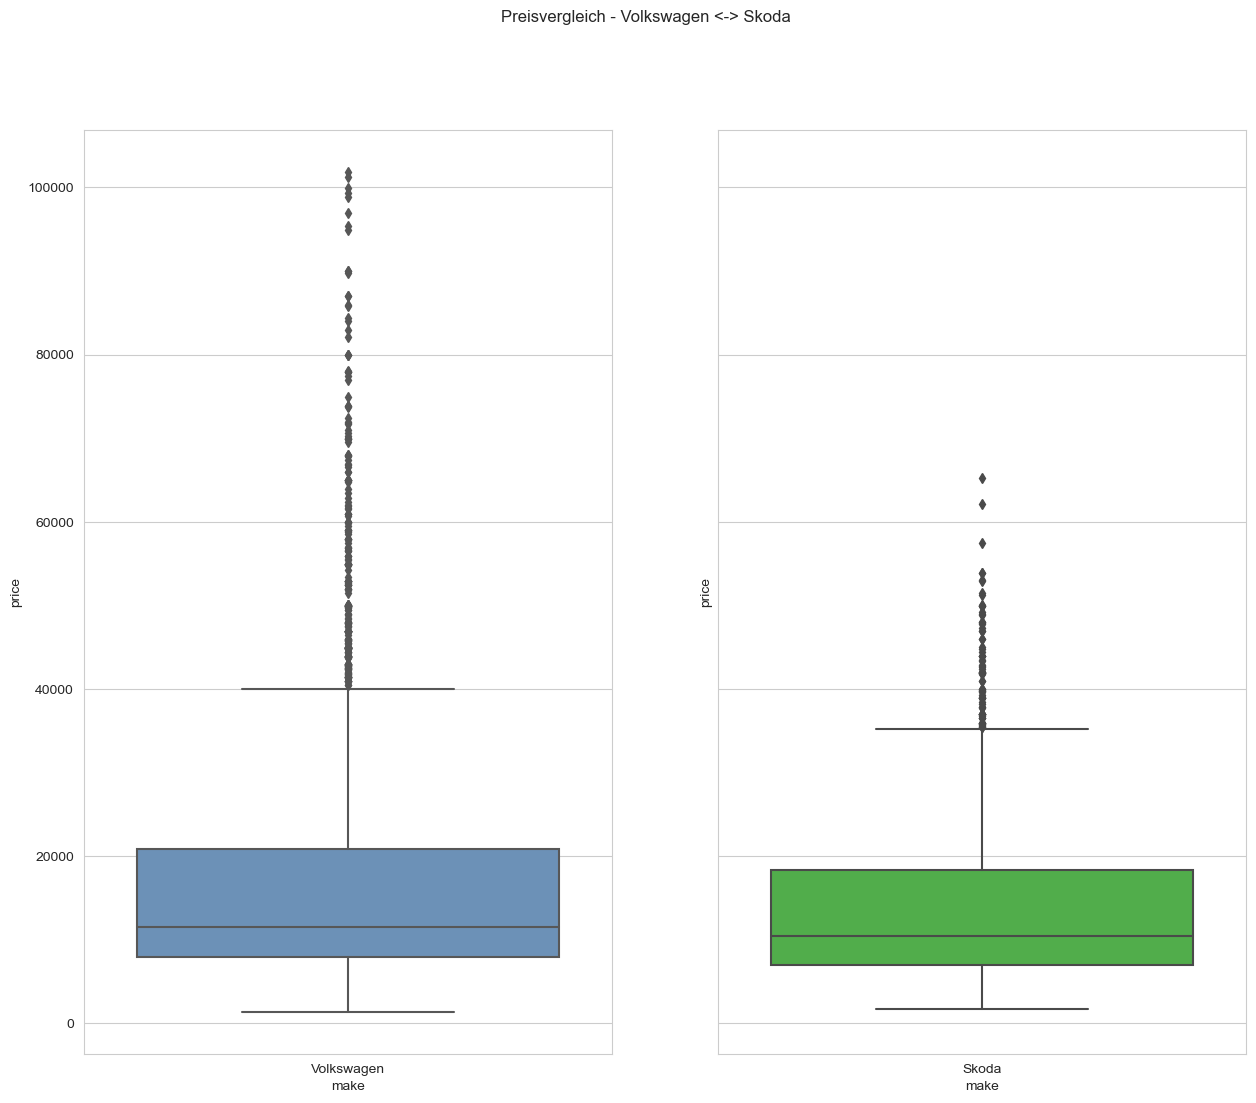

In [52]:
print(f"Volkswagen: {df[df['make'] == 'Volkswagen']['price'].mean().round(2)} €  Durchschnittspreis ")
print(f"Skoda:      {df[df['make'] == 'Skoda']['price'].mean().round(2)} € Durchschnittspreis ")

fig, axes = plt.subplots(1, 2, figsize=(15, 12), sharey=True)
fig.suptitle('Preisvergleich - Volkswagen <-> Skoda')
sns.boxplot(ax=axes[0], x='make', y='price', data=df[df['make'] == 'Volkswagen'], color='#6091c3')

sns.boxplot(ax=axes[1], x='make', y='price', data=df[df['make'] == 'Skoda'], color='#42bd3b')

In [53]:
print("Wir sehen hier, dass die Preisspanne für beide Marken relativ ähnlich ist.")
print("Volkswagen hat viele teurere Fahrzeuge, dass kann aber auch daran liegen, dass sie unteranderen auch Modelle wie Transporter und T-Busse verkaufen.")
print()
print("Es ist hier aber deutlich zu erkennen, dass Skoda ohne Ausreißer das kleinere Maximum und das kleinere dritte Quartil hat.")
print("Was daraus schließen lässt, dass Verbraucher bei Fahrzeugen gleicher Qualität und Motorisierung eher zur Tochtergesellschaft neigen.")

Wir sehen hier, dass die Preisspanne für beide Marken relativ ähnlich ist.
Volkswagen hat viele teurere Fahrzeuge, dass kann aber auch daran liegen, dass sie unteranderen auch Modelle wie Transporter und T-Busse verkaufen.

Es ist hier aber deutlich zu erkennen, dass Skoda ohne Ausreißer das kleinere Maximum und das kleinere dritte Quartil hat.
Was daraus schließen lässt, dass Verbraucher bei Fahrzeugen gleicher Qualität und Motorisierung eher zur Tochtergesellschaft neigen.


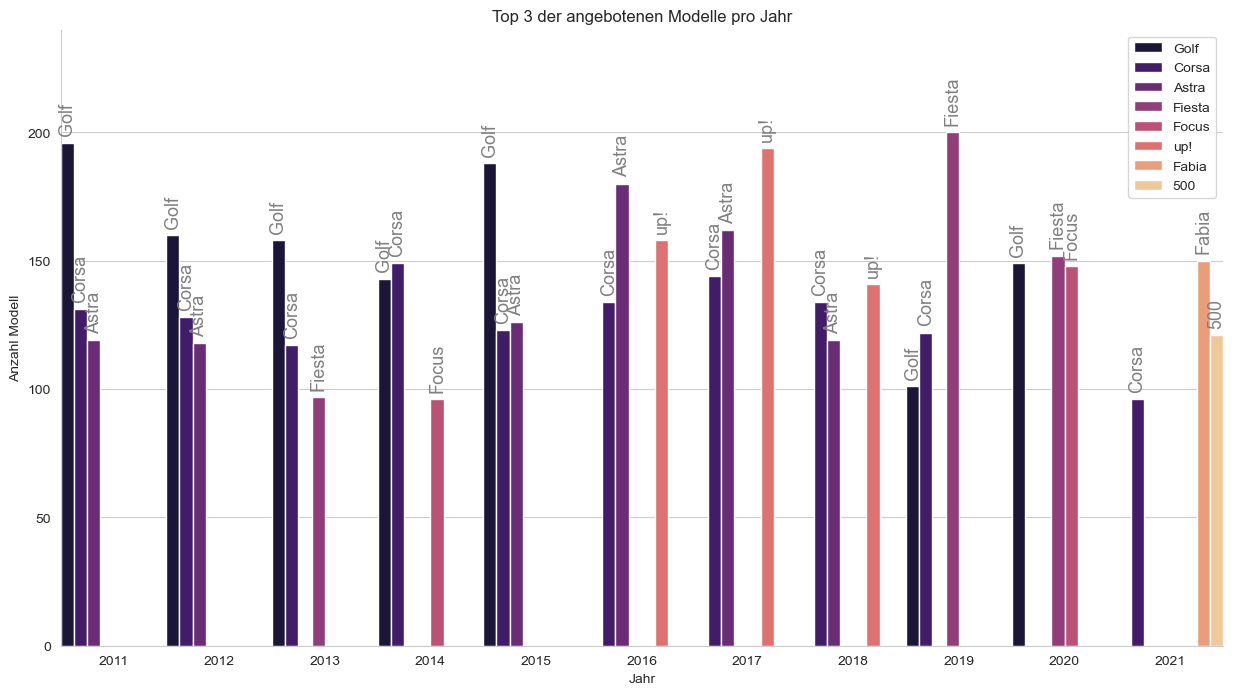

In [54]:
f, ax = plt.subplots(figsize = (15,8))
sns.barplot(data= df_topMakeAndModelByYear,x="Jahr", y="Anzahl Modell", hue="TopModell",palette = 'magma', width=1)
plt.title('Top 3 der angebotenen Modelle pro Jahr')
ax.legend(ncol = 1, loc = 'upper right')
# customize the label
labels1 = ['Golf' for i, v in enumerate(ax.containers[0])]
labels2 = ['Corsa' for i, v in enumerate(ax.containers[1])]
labels3 = ['Astra' for i, v in enumerate(ax.containers[2])]
labels4 = ['Fiesta' for i, v in enumerate(ax.containers[3])]
labels5 = ['Focus' for i, v in enumerate(ax.containers[4])]
labels6 = ['up!' for i, v in enumerate(ax.containers[5])]
labels7 = ['Fabia' for i, v in enumerate(ax.containers[6])]
labels8 = ['500' for i, v in enumerate(ax.containers[7])]
# set the bar label
ax.bar_label(ax.containers[0], labels=labels1, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[1], labels=labels2, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[2], labels=labels3, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[3], labels=labels4, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[4], labels=labels5, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[5], labels=labels6, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[6], labels=labels7, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.bar_label(ax.containers[7], labels=labels8, label_type='edge', size=13, rotation = 90, padding=5,color='grey')
ax.margins(y=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [55]:
print("Wir können sehen, dass der Golf das wahrscheinlich meistgehandelste Fahrzeug auf dem Portal über die Jahre ist.")
print("Gefolgt von dem Corsa, Astra und Fiesta.")
print("Da sie aber allgemein die Top Fahrzeuge des Datensets sind, ist dies aber auch nicht verwunderlich.")

Wir können sehen, dass der Golf das wahrscheinlich meistgehandelste Fahrzeug auf dem Portal über die Jahre ist.
Gefolgt von dem Corsa, Astra und Fiesta.
Da sie aber allgemein die Top Fahrzeuge des Datensets sind, ist dies aber auch nicht verwunderlich.


## Ausreißer behandeln

C:\Users\Crocop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


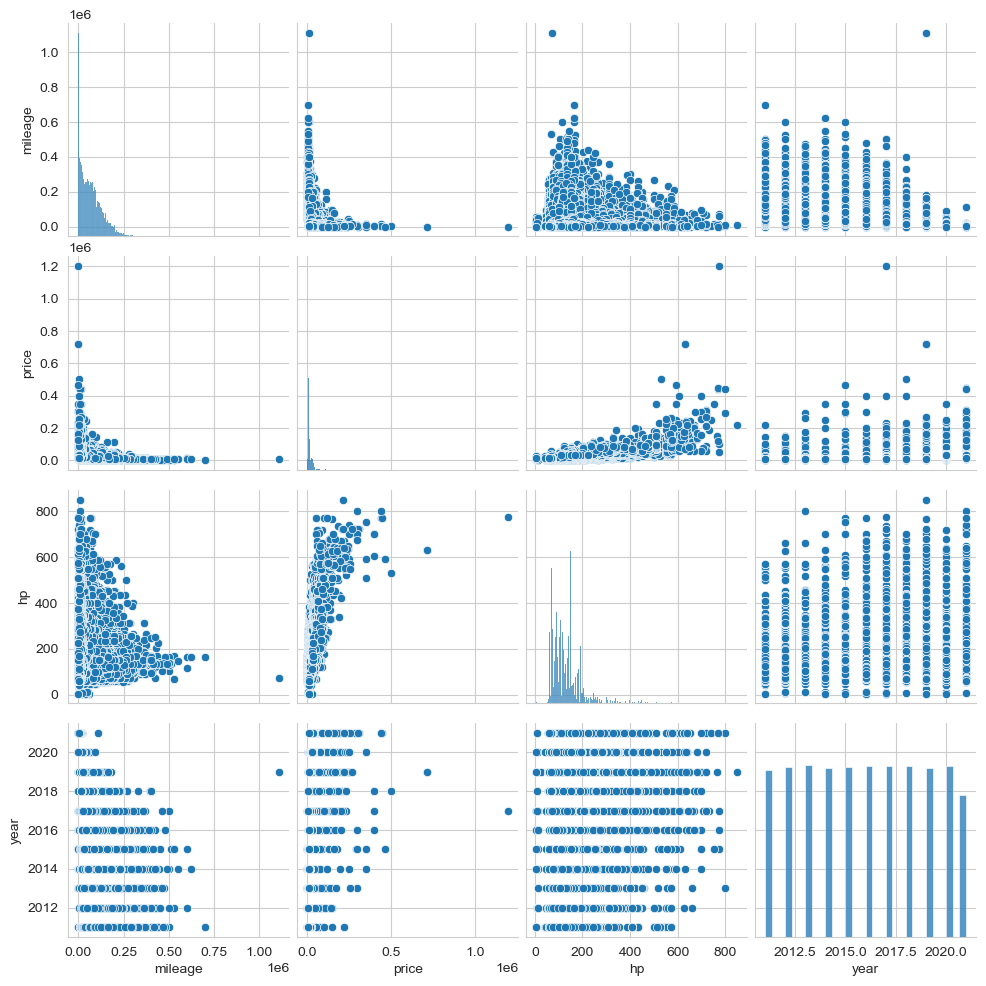

In [56]:
sns.pairplot(df)

In [57]:
print("- Preis und Kilometer sind negativ korreliert. Je mehr Kilometer das Auto hat, desto weniger ist es Wert.")
print("- PS und Kilometer zeigen uns, dass die Autos, welche weniger Kraft haben, häufiger bewegt werden.")
print("- Das Jahr und die Kilometer zeigen uns das neuere Autos tendenziell weniger Kilometer ausweisen.")
print("- Die PS und der Preis sind positiv korreliert, je mehr Leistung ein Auto hat, desto teurer ist es.")

- Preis und Kilometer sind negativ korreliert. Je mehr Kilometer das Auto hat, desto weniger ist es Wert.
- PS und Kilometer zeigen uns, dass die Autos, welche weniger Kraft haben, häufiger bewegt werden.
- Das Jahr und die Kilometer zeigen uns das neuere Autos tendenziell weniger Kilometer ausweisen.
- Die PS und der Preis sind positiv korreliert, je mehr Leistung ein Auto hat, desto teurer ist es.


## Price Outliers

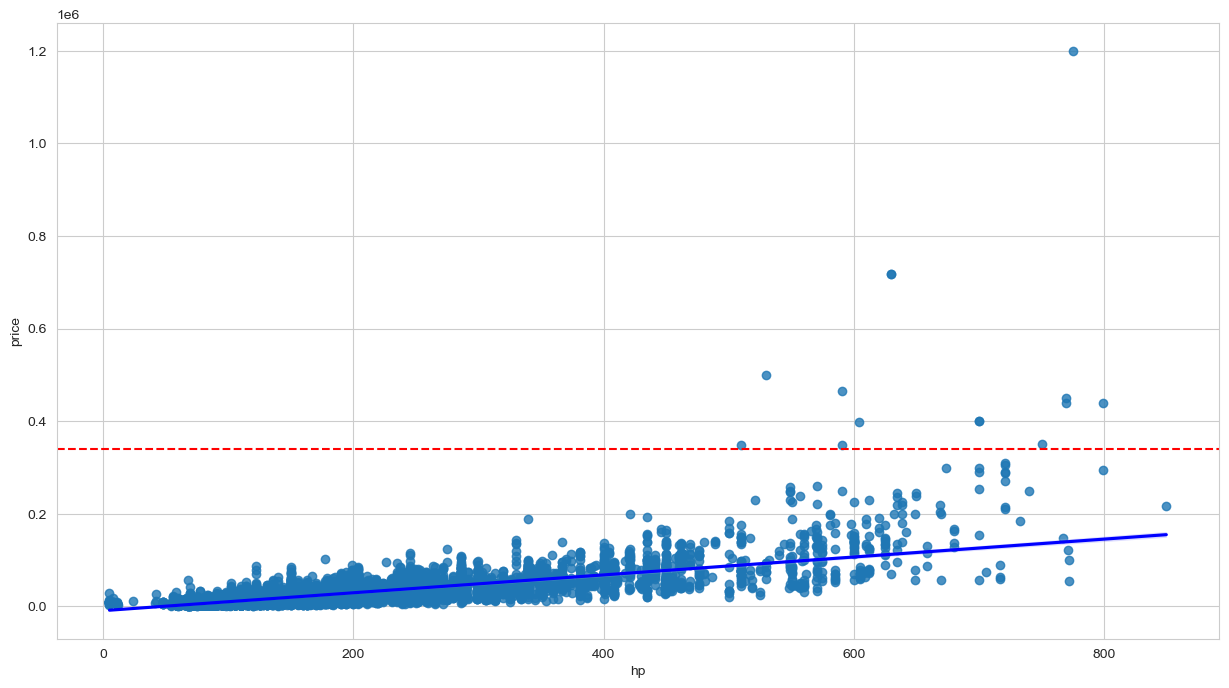

In [58]:
plt.figure(figsize=(15,8))
ax = sns.regplot(data=df, x='hp', y='price', scatter=True, logx=False, line_kws={"color": "blue"})
ax.axhline(340000, linestyle= "dashed", color = "red")

In [59]:
df[df['price']>340000]

,mileage,make,model,fuel,gear,offerType,price,hp,year
2086,1200,Lamborghini,Aventador,Gasoline,Automatic,Used,399999,700.0,2016
7042,14090,Lamborghini,Aventador,Gasoline,Automatic,Employee's car,439900,770.0,2021
7043,3600,Lamborghini,Aventador,Gasoline,Automatic,Used,449900,770.0,2021
11112,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019
11113,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019
15441,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530.0,2018
17333,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799.0,2021
18280,29,Porsche,991,Gasoline,Manual,Used,349000,510.0,2020
20434,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017
22027,14022,Lamborghini,Aventador,Gasoline,Automatic,Used,349800,751.0,2015


In [60]:
print(f"Es sind {df[df['price']>340000].value_counts().sum()} Fahrzeuge, welche über 340.000 € kosten.")
print(f"Dies enspricht {df[df['price']>340000].value_counts().sum()/df.shape[0]*100:.2f} % der Gesamtfahrzeuge.")
print()
print("Laut Diagramm sind das Ausreißer. Diese entfernen wir im nächsten Schritt, um später eine genauere Vorhersage treffen zu können.")

Es sind 14 Fahrzeuge, welche über 340.000 € kosten.
Dies enspricht 0.03 % der Gesamtfahrzeuge.

Laut Diagramm sind das Ausreißer. Diese entfernen wir im nächsten Schritt, um später eine genauere Vorhersage treffen zu können.


In [61]:
df_new = df[(df.price<=340000)]

In [62]:
print("Anzahl der Autos:")
print(df.shape[0])
print("Anzahl der Autos < 340.000 €:")
print(df_new.shape[0])

Anzahl der Autos:
43946
Anzahl der Autos < 340.000 €:
43932


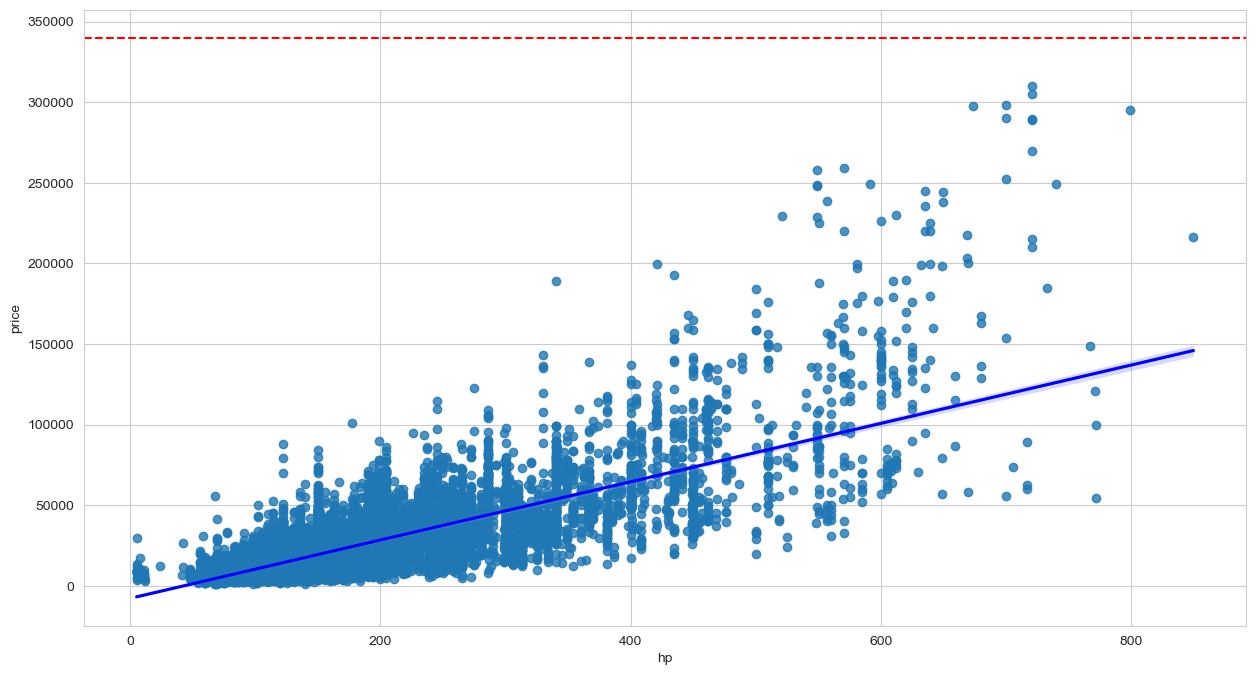

In [63]:
plt.figure(figsize=(15,8))
ax = sns.regplot(data=df_new, x='hp', y='price', scatter=True, logx=False, line_kws={"color": "blue"})
ax.axhline(340000, linestyle= "dashed", color = "red")

## Mileage Outliers

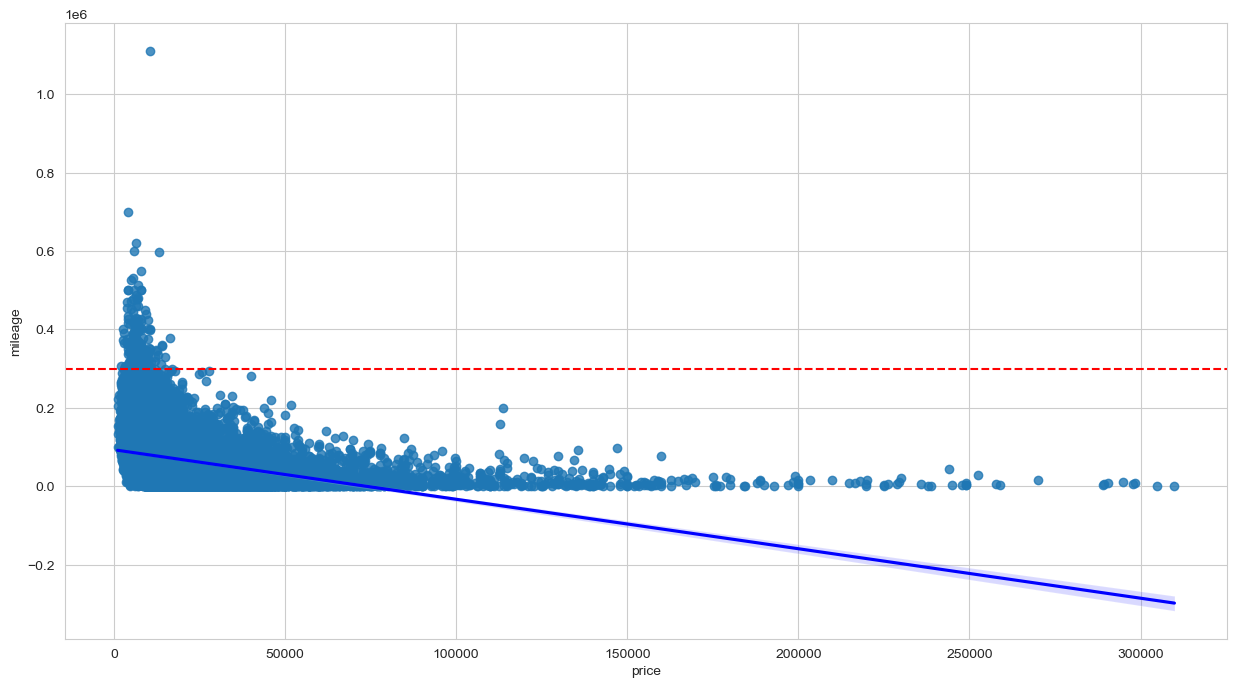

In [64]:
plt.figure(figsize=(15,8))
ax = sns.regplot(data=df_new, x='price', y='mileage', scatter=True, logx=False, line_kws={"color": "blue"})
ax.axhline(300000, linestyle= "dashed", color = "red")

In [65]:
print("Wir gehen davon aus, dass die Autos, welche mehr als 300.000 km gefahren sind, relativ uninteressant auf dem Gebrauchtmarkt sind und diese meisten im Ausland landen.")
print()
print("Für unser Modell wollen wir uns jedoch nur Autos ansehen, welche hierzulande auch gekauft werden würden.")

Wir gehen davon aus, dass die Autos, welche mehr als 300.000 km gefahren sind, relativ uninteressant auf dem Gebrauchtmarkt sind und diese meisten im Ausland landen.

Für unser Modell wollen wir uns jedoch nur Autos ansehen, welche hierzulande auch gekauft werden würden.


In [66]:
df_new[df_new['mileage'] > 300000]

,mileage,make,model,fuel,gear,offerType,price,hp,year
12,427000,Mercedes-Benz,E 250,Diesel,Automatic,Used,6990,204.0,2011
84,352000,Peugeot,Boxer,Diesel,Manual,Used,10298,150.0,2015
394,368777,Volkswagen,Caddy,CNG,Manual,Used,3950,109.0,2011
401,416000,Opel,Insignia,Diesel,Manual,Used,3990,160.0,2011
421,322418,Skoda,Octavia,Diesel,Automatic,Used,4900,140.0,2012
...,...,...,...,...,...,...,...,...,...
36614,411000,Mercedes-Benz,E 200,Diesel,Automatic,Used,6999,136.0,2015
37154,354557,Toyota,Auris,Electric/Gasoline,Automatic,Used,5880,99.0,2015
39689,360000,Volkswagen,Touran,Diesel,Automatic,Used,7700,150.0,2017
39731,398000,Volkswagen,Touran,Diesel,Automatic,Used,7900,150.0,2018


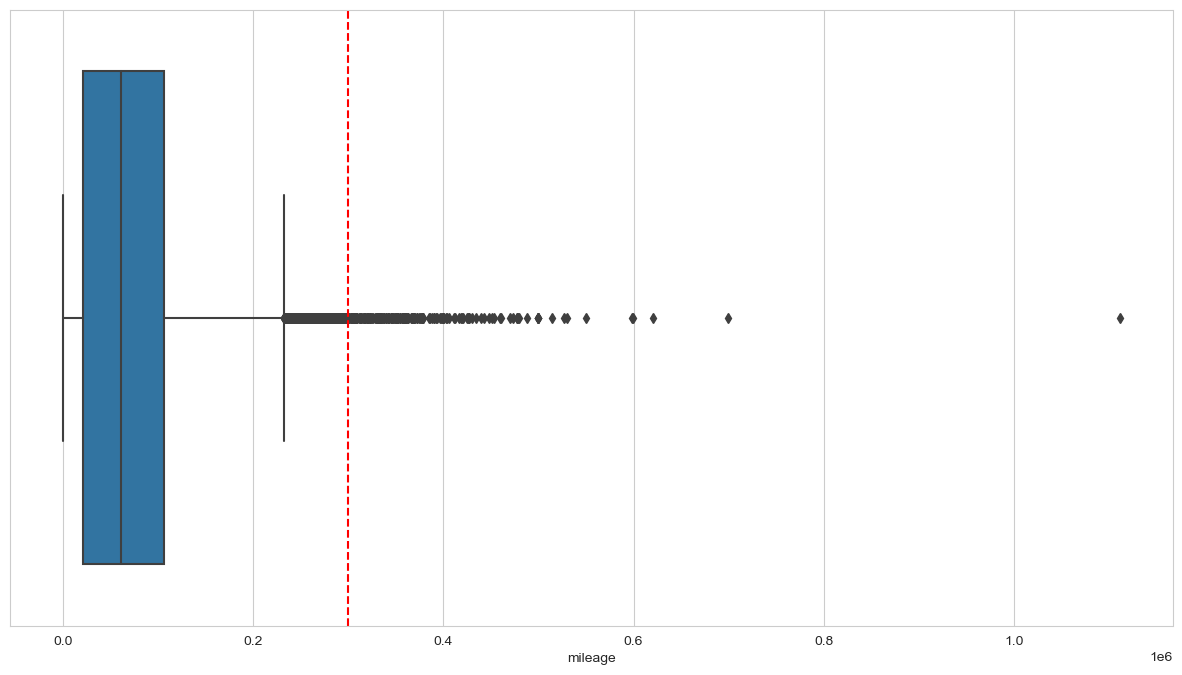

In [67]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df_new["mileage"])
ax.axvline(x = 300000, linestyle= "dashed", color = "red")

In [68]:
print(f"Es sind {df_new[df_new['mileage']>300000].value_counts().sum()} Fahrzeuge, welche über 300.000 km kosten.")
print(f"Dies enspricht {df_new[df_new['mileage']>300000].value_counts().sum()/df.shape[0]*100:.2f} % der Gesamtfahrzeuge.")
print()
print("Laut Boxplot sind das sehr viele Ausreißer. Einen Teil dieser entfernen wir im nächsten Schritt, um später eine genauere Vorhersage treffen zu können.")

Es sind 186 Fahrzeuge, welche über 300.000 km kosten.
Dies enspricht 0.42 % der Gesamtfahrzeuge.

Laut Boxplot sind das sehr viele Ausreißer. Einen Teil dieser entfernen wir im nächsten Schritt, um später eine genauere Vorhersage treffen zu können.


In [69]:
df_new = df_new[(df_new.mileage<=300000)]

In [70]:
print("Anzahl der Autos:")
print(df.shape[0])
print("Anzahl der Autos <= 340.000 € und <= 300.000 km:")
print(df_new.shape[0])

Anzahl der Autos:
43946
Anzahl der Autos <= 340.000 € und <= 300.000 km:
43746


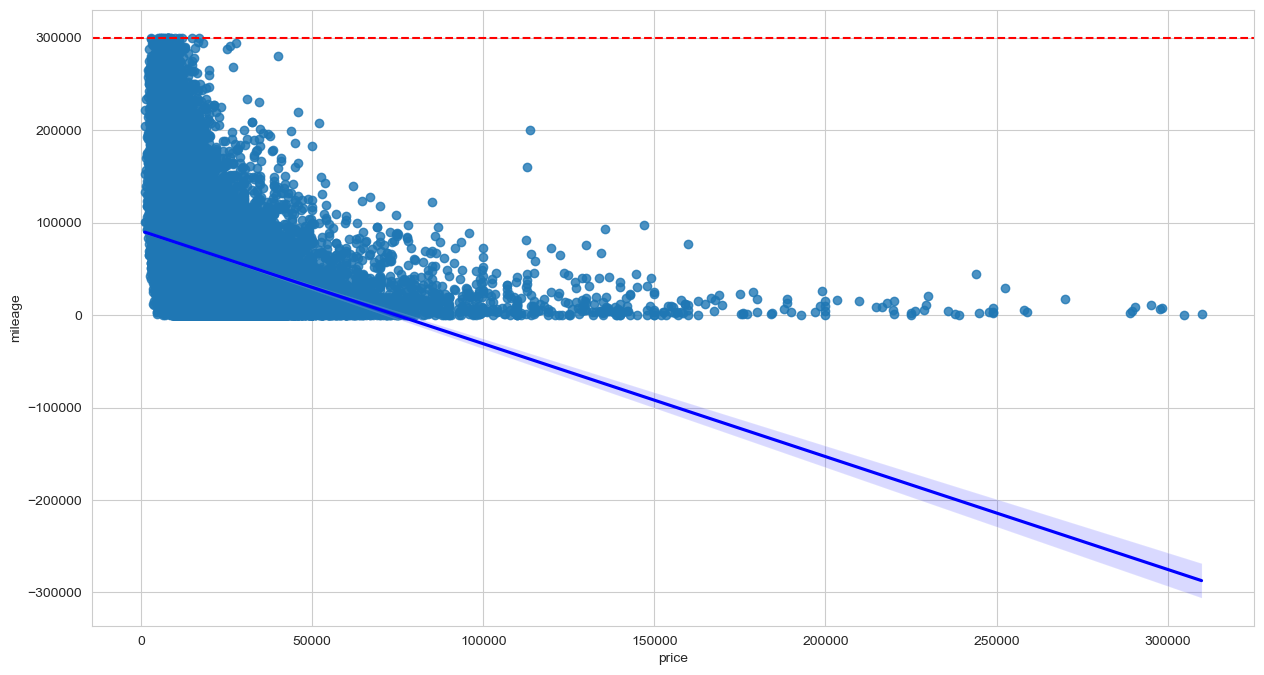

In [71]:
plt.figure(figsize=(15,8))
ax = sns.regplot(data=df_new, x='price', y='mileage', scatter=True, logx=False, line_kws={"color": "blue"})
ax.axhline(300000, linestyle= "dashed", color = "red")

Wir sehen nun im Pairplot, dass wir schönere Schaubilder bekommen und erkennen die Korrelationen besser.


C:\Users\Crocop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


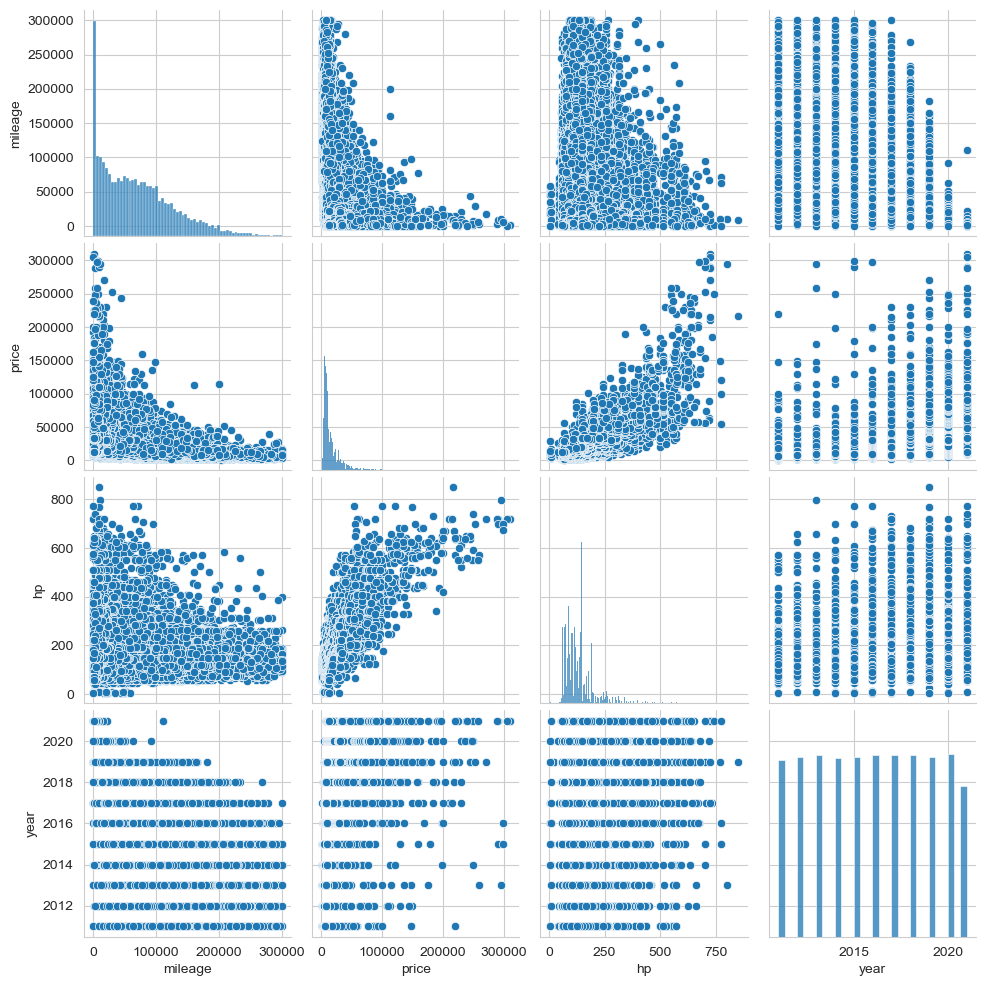

In [72]:
print("Wir sehen nun im Pairplot, dass wir schönere Schaubilder bekommen und erkennen die Korrelationen besser.")
sns.pairplot(df_new)

## Korrelations Matrix

<Axes: >

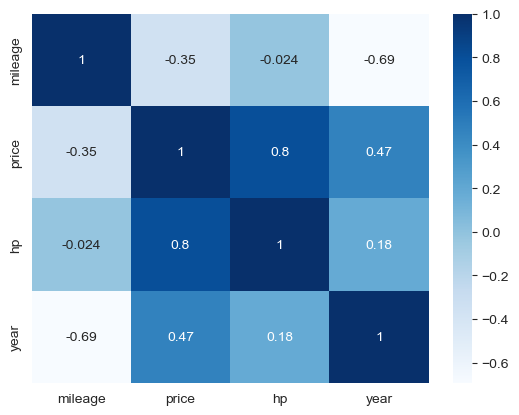

In [73]:
corr = df_new.corr(numeric_only = True)
sns.heatmap(corr, cmap="Blues", annot=True)

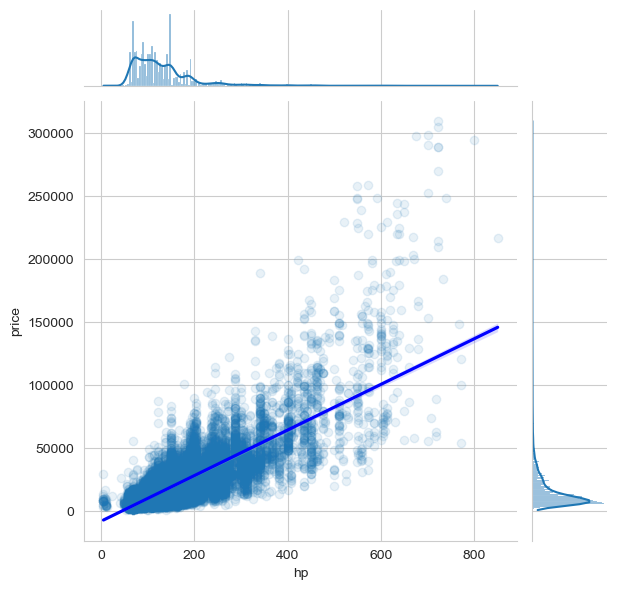

In [74]:
sns.jointplot(x='hp', y='price', data = df_new, kind = 'reg', scatter_kws={'alpha':0.1}, line_kws={"color": "blue"})

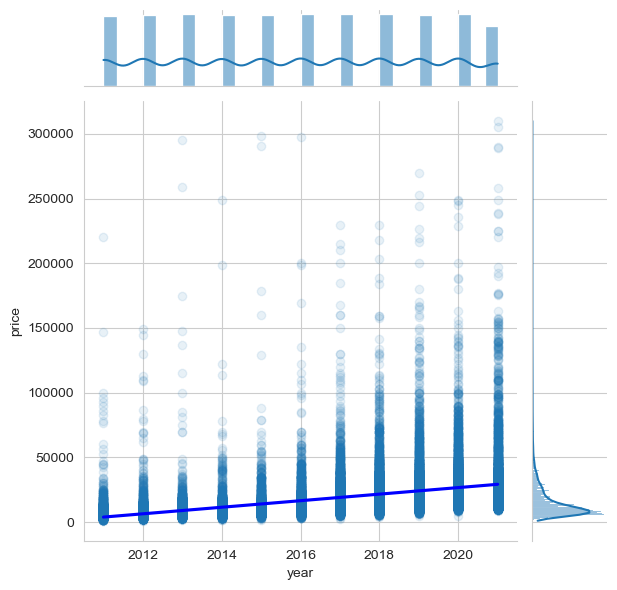

In [75]:
sns.jointplot(x='year', y='price', data = df_new, kind = 'reg', scatter_kws={'alpha':0.1}, line_kws={"color": "blue"})

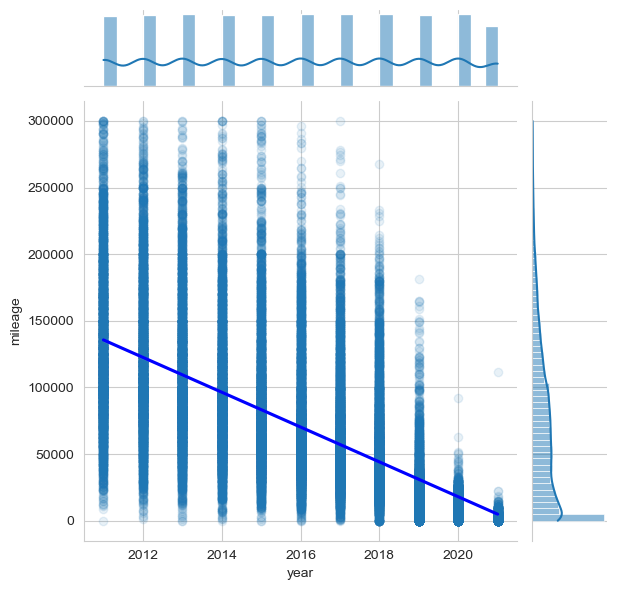

In [76]:
sns.jointplot(x='year', y='mileage', data = df_new, kind = 'reg', scatter_kws={'alpha':0.1}, line_kws={"color": "blue"})

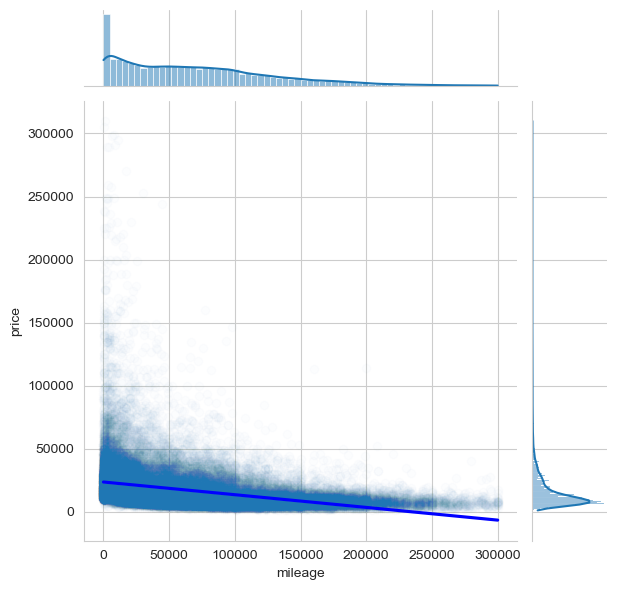

In [77]:
sns.jointplot(x='mileage', y='price', data = df_new, kind = 'reg', scatter_kws={'alpha':0.01}, line_kws={"color": "blue"})

# Vorbereitung Machine Learning

## Kraftstoffart anpassen

In [78]:
df_new['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'LPG', 'CNG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [79]:
df_new['fuel'].replace(['Electric/Gasoline', 'Electric/Diesel'],  'Hybrid', inplace=True)
df_new['fuel'].replace(['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 'Others', inplace=True)

In [80]:
df_new['fuel'].unique()

array(['Diesel', 'Gasoline', 'Hybrid', 'Others', 'Electric'], dtype=object)

In [81]:
df_new

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
43942,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
43943,99,Fiat,500,Hybrid,Manual,Pre-registered,12490,71.0,2021
43944,550,Fiat,500,Hybrid,Manual,Demonstration,12805,69.0,2021
43945,837,Fiat,Panda,Hybrid,Manual,Demonstration,12805,69.0,2021


## OneHotEncoding

In [83]:
ohe = OneHotEncoder(handle_unknown='error', sparse_output=False).set_output(transform='pandas')

In [84]:
# Output ist eine Klasse von OHE
print(ohe)

OneHotEncoder(sparse_output=False)


In [85]:
ohetransform = ohe.fit_transform(df_new[["make", "model", "fuel", "gear", "offerType"]])

In [86]:
ohetransform

,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,make_Baic,make_Bentley,...,fuel_Hybrid,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
joblib.dump(ohe, 'ohehotencoder.pkl')

In [142]:
df_ohe = pd.concat([df_new, ohetransform], axis = 1).drop(columns = ["make", "model", "fuel", "gear", "offerType"])

In [88]:
df_ohe

,mileage,price,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,...,fuel_Hybrid,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6800,116.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92800,6877,122.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,149300,6900,160.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,96200,6950,110.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,156000,6950,156.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,10,12340,72.0,2021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43943,99,12490,71.0,2021,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43944,550,12805,69.0,2021,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43945,837,12805,69.0,2021,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## TrainTest Split

In [91]:
X = df_ohe.drop(columns=['price'])
y = df_ohe['price']
X_woONE = df_new.drop(columns=['price'])
y_woONE = df_new['price']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train_woONE, X_test_woONE, y_train_woONE, y_test_woONE = train_test_split(X_woONE, y_woONE, test_size=0.30, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_test_woONE: {y_test_woONE.shape}")

X_train: (30622, 913)
y_train: (30622,)
X_test: (13124, 913)
y_test: (13124,)
y_test_woONE: (13124,)


## LinearRegression

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
joblib.dump(lr, 'linearregression.pkl')

In [96]:
y_pred_test_lr = lr.predict(X_test)

In [97]:
y_pred_test_lr

array([15583.01721198,  9227.47922248,  4865.06899034, ...,
        4183.4388994 ,  8564.31417406, 13672.43883593])

In [98]:
# Accuracy score is only for classification problems. 
# For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

# MAE
mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

# R2-Score
r2_lr = r2_score(y_test, y_pred_test_lr)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae_lr))
print('RMSE is {}'.format(rmse_lr))
print('R2 score is {}'.format(r2_lr))
print("\n")

The model performance for test set
--------------------------------------
MAE is 2861.0836230798254
RMSE is 5992.967875277006
R2 score is 0.8902146423261653




In [99]:
# prediction
y_pred_train = lr.predict(X_train)

# MAE
mae = mean_absolute_error(y_train, y_pred_train)

# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

# R2-Score
r2 = r2_score(y_train, y_pred_train)


print("The model performance for train set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for train set
--------------------------------------
MAE is 2576.3618819204685
RMSE is 4541.172279059517
R2 score is 0.9227141489296665




In [100]:
y_test = y_test.reset_index(drop=True)
pred_series_lr = pd.Series(y_pred_test_lr)  
df_test_pred = pd.concat([y_test,pred_series_lr],axis=1)
df_test_pred.rename(columns={'price': 'test_price', 0: 'pred_price'}, inplace=True)
df_test_pred

,test_price,pred_price
0,14950,15583.017212
1,9990,9227.479222
2,7299,4865.068990
3,12459,12370.902334
4,8400,6380.400622
...,...,...
13119,7999,8172.533867
13120,4300,2082.807734
13121,5950,4183.438899
13122,9490,8564.314174


In [101]:
df_test_pred[df_test_pred['pred_price']<0]

,test_price,pred_price
80,3600,-1059.421141
128,3850,-484.789981
276,3900,-487.541875
293,2599,-4339.638245
359,4350,-1063.571337
...,...,...
12872,2990,-853.537654
12879,5200,-739.837134
12936,1999,-1139.976753
13036,3000,-962.546842


## Random Forest

In [102]:
#X_train, X_test, y_train, y_test
rf = RandomForestRegressor(random_state=42)

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# R2-Score
r2_rf = r2_score(y_test, y_pred_rf)


print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae_rf))
print('RMSE is {}'.format(rmse_rf))
print('R2 score is {}'.format(r2_rf))
print("\n")

The model performance for test set
--------------------------------------
MAE is 2036.6572176228692
RMSE is 5237.844590932914
R2 score is 0.9161378989493418




In [ ]:
joblib.dump(rf, 'randomforest.pkl') 

In [105]:
y_test = y_test.reset_index(drop=True)
pred_series_rf = pd.Series(y_pred_rf)  
df_test_pred = pd.concat([y_test,pred_series_rf],axis=1)
df_test_pred.rename(columns={'price': 'test_price', 0: 'pred_price'}, inplace=True)
df_test_pred

,test_price,pred_price
0,14950,14731.19
1,9990,8514.46
2,7299,8237.58
3,12459,11459.17
4,8400,8587.77
...,...,...
13119,7999,8957.99
13120,4300,5238.49
13121,5950,6591.11
13122,9490,8071.10


In [106]:
df_test_pred[df_test_pred['pred_price']<0]

,test_price,pred_price


## GradientBoosting

In [107]:
gbt = GradientBoostingRegressor(random_state=42)

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

# MAE
mae_gbt = mean_absolute_error(y_test, y_pred_gbt)

# RMSE
rmse_gbt = np.sqrt(mean_squared_error(y_test, y_pred_gbt))

# R2-Score
r2_gbt = r2_score(y_test, y_pred_gbt)


print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae_gbt))
print('RMSE is {}'.format(rmse_gbt))
print('R2 score is {}'.format(r2_gbt))
print("\n")

The model performance for test set
--------------------------------------
MAE is 2666.2827356829557
RMSE is 5527.837493056987
R2 score is 0.906594799697901




In [108]:
y_test = y_test.reset_index(drop=True)
pred_series_gb = pd.Series(y_pred_gbt)  
df_test_pred = pd.concat([y_test,pred_series_gb],axis=1)
df_test_pred.rename(columns={'price': 'test_price', 0: 'pred_price'}, inplace=True)
df_test_pred

,test_price,pred_price
0,14950,11948.821481
1,9990,8072.799930
2,7299,7556.207812
3,12459,9713.514931
4,8400,6799.542207
...,...,...
13119,7999,7905.225853
13120,4300,5812.612684
13121,5950,6790.104803
13122,9490,9248.440756


In [109]:
df_test_pred[df_test_pred['pred_price']<0]

,test_price,pred_price


## Vergleich der Modelle

Text(0.5, 0, 'vorhergesagter Preis')

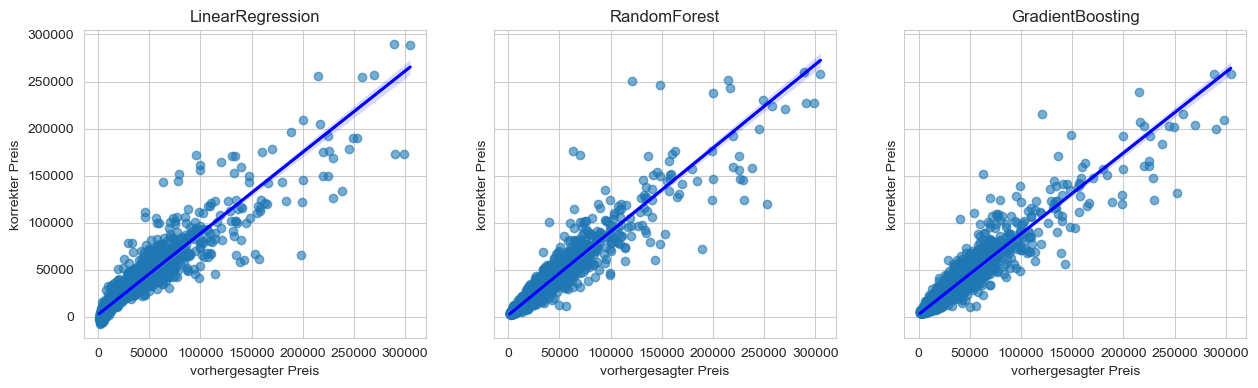

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
sns.regplot(ax=axes[0], x=y_test, y=y_pred_test_lr, scatter_kws={'alpha':0.6}, line_kws={"color": "blue"})
sns.regplot(ax=axes[1], x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.6}, line_kws={"color": "blue"})
sns.regplot(ax=axes[2], x=y_test, y=y_pred_gbt, scatter_kws={'alpha':0.6}, line_kws={"color": "blue"})
axes[0].set_title('LinearRegression')
axes[1].set_title('RandomForest')
axes[2].set_title('GradientBoosting')
axes[0].set_ylabel('korrekter Preis')
axes[1].set_ylabel('korrekter Preis')
axes[2].set_ylabel('korrekter Preis')
axes[0].set_xlabel('vorhergesagter Preis')
axes[1].set_xlabel('vorhergesagter Preis')
axes[2].set_xlabel('vorhergesagter Preis')

In [111]:
data_compare_2 = [['MAE', mae_lr, mae_rf, mae_gbt], ['RMSE', rmse_lr, rmse_rf, rmse_gbt], ['R2-Score', r2_lr, r2_rf, r2_gbt]]
 
# Create the pandas DataFrame
df_compare2 = pd.DataFrame(data_compare_2, columns=['', 'LinearRegression','RandomForest', 'GradientBoosting'])
df_compare2.round(4)

,,LinearRegression,RandomForest,GradientBoosting
0,MAE,2861.0836,2036.6572,2666.2827
1,RMSE,5992.9679,5237.8446,5527.8375
2,R2-Score,0.8902,0.9161,0.9066


In [112]:
df_test_pred_all = pd.concat([X_test_woONE.reset_index(drop=True) ,y_test.reset_index(drop=True),pred_series_lr,pred_series_rf,pred_series_gb],axis=1)
df_test_pred_all.rename(columns={0: 'LinearRegression', 1: 'RandomForest', 2:'GradientBoosting'}, inplace=True)
df_test_pred_all.head(50).round(2)

,mileage,make,model,fuel,gear,offerType,hp,year,price,LinearRegression,RandomForest,GradientBoosting
0,53400,Kia,Sportage,Gasoline,Manual,Used,132.0,2017,14950,15583.02,14731.19,11948.82
1,38000,Ford,Fiesta,Gasoline,Manual,Used,82.0,2016,9990,9227.48,8514.46,8072.80
2,166000,Peugeot,308,Diesel,Manual,Used,114.0,2014,7299,4865.07,8237.58,7556.21
3,98500,BMW,X1,Gasoline,Manual,Used,150.0,2012,12459,12370.90,11459.17,9713.51
4,170150,Ford,Kuga,Diesel,Manual,Used,140.0,2011,8400,6380.40,8587.77,6799.54
5,137873,BMW,523,Gasoline,Automatic,Used,204.0,2011,16980,14601.24,14146.47,13909.18
6,153000,Opel,Zafira,Diesel,Manual,Used,170.0,2018,11990,14623.01,13458.41,16699.21
7,44963,Volkswagen,Tiguan,Gasoline,Automatic,Used,150.0,2018,25444,25106.32,24195.24,23179.70
8,61400,Volkswagen,Passat Variant,Diesel,Automatic,Used,150.0,2018,19889,22115.06,20227.46,24449.74
9,56898,Toyota,Aygo,Gasoline,Manual,Used,68.0,2012,5850,2173.63,5263.54,5243.24


## RandomForest optimization

## RandomizedSearchCV

In [139]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)] # default = 100
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features = [1.0] # default = 1.0
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)] # default=None
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10] # default=2
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5] #default=1

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 136, 172, 209, 245, 281, 318, 354, 390, 427, 463, 500], 'max_features': [1.0], 'max_depth': [5, 10, 15, 20, 25, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}


In [140]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [141]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  28.7s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  29.1s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  29.1s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  28.9s
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  29.9s
[CV] END max_depth=5, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=136; total time=  20.4s
[CV] END max_depth=5, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=136; total time=  20.8s
[CV] END max_depth=5, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=136; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': [1.0],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   random_state=42, verbose=2)

In [144]:
rf_random.best_params_

{'n_estimators': 390,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_depth': 30}

In [145]:
predictions=rf_random.predict(X_test)

In [146]:
r2_randomized = r2_score(y_test,predictions)
mae_randomized = mean_absolute_error(y_test, predictions)
rmse_randomized = np.sqrt(mean_squared_error(y_test,predictions))
print("mae: ",mae_randomized)
print("rmse: ",rmse_randomized)
print("R_squared: ",r2_randomized)

mae:  2123.238876720618
rmse:  5338.601105573528
R_squared:  0.9128804816264117


In [147]:
data_compare_3 = [['MAE', mae_rf, mae_randomized], ['RMSE', rmse_rf, rmse_randomized], ['R2-Score', r2_rf, r2_randomized]]
 
# Create the pandas DataFrame
df_compare3 = pd.DataFrame(data_compare_3, columns=['', 'Default','RandomizedSearch'])
df_compare3.round(4)

,,Default,RandomizedSearch
0,MAE,2036.6572,2123.2389
1,RMSE,5237.8446,5338.6011
2,R2-Score,0.9161,0.9129


## GridSearchCV

In [123]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300], # default = 100
    'max_features': [1.0], # default = 1.0
    'max_depth': [1,2,3,4, None], # default = None
    'min_samples_split': [2, 5, 10], # default = 2
    'min_samples_leaf': [1, 2, 5] # default = 1
} 

grid = GridSearchCV(RandomForestRegressor(random_state=42), parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [134]:
grid.best_estimator_

RandomForestRegressor(random_state=42)

In [137]:
print (grid.best_score_, grid.best_params_)

0.925136081527491 {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [127]:
rf_grid = RandomForestRegressor(random_state=42, max_depth=None, max_features=1.0, min_samples_leaf=1, 
                                min_samples_split=2, n_estimators= 100)
rf_grid.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [128]:
predictions_grid=rf_grid.predict(X_test)

In [129]:
r2_grid = r2_score(y_test,predictions_grid)
mae_grid = mean_absolute_error(y_test, predictions_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test,predictions_grid))
print("mae: ",mae_grid)
print("rmse: ",rmse_grid)
print("R_squared: ",r2_grid)

mae:  2036.6572176228692
rmse:  5237.844590932914
R_squared:  0.9161378989493418


## Vergleich der beiden Optimierungen

In [148]:
data_compare_4 = [['MAE', mae_rf, mae_randomized, mae_grid], ['RMSE', rmse_rf, rmse_randomized, rmse_grid], ['R2-Score', r2_rf, r2_randomized, r2_grid]]
 
# Create the pandas DataFrame
df_compare4 = pd.DataFrame(data_compare_4, columns=['', 'Default','RandomizedSearch', 'GridSearch'])
df_compare4.round(4)

,,Default,RandomizedSearch,GridSearch
0,MAE,2036.6572,2123.2389,2036.6572
1,RMSE,5237.8446,5338.6011,5237.8446
2,R2-Score,0.9161,0.9129,0.9161


## Prediction

In [131]:
#["make", "model", "fuel", "gear", "offerType"]
test_data = ohe.transform(np.array([['Volkswagen', 'T-Roc', 'Gasoline', 'Manual', 'Used']]))
test_data

C:\Users\Crocop\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,make_Baic,make_Bentley,...,fuel_Hybrid,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
d = {'mileage': 19268, 'hp': 110, 'year': 2023}
df_mhy = pd.DataFrame(data=d , index=[0])
print(df_mhy)
df_xxx = pd.concat([df_mhy, test_data], axis = 1)
df_xxx

   mileage   hp  year
0    19268  110  2023


,mileage,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,...,fuel_Hybrid,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,19268,110,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
xxx = rf.predict(df_xxx)
xxx.round(2)

array([18455.35])